# FRANCOIS LARUELLE'S 'DICTIONARY OF NON-PHILOSOPHY' 
## Notebook2: 
## Extracting Citations of Mentioned Philosophers
## By Moses Boudourides & Benjamin Pang

In [1]:
import urllib, os, codecs, random, operator, re, string, copy, dateutil.parser, itertools, pickle, datetime, math, pandas as pd, numpy as np, matplotlib.pyplot as plt
from collections import Counter
from string import punctuation, digits
import pathlib
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_lg')
import inflect
import nltk
from nltk import word_tokenize
from wordcloud import WordCloud
import itertools as it
import pandas as pd
import numpy as np
import networkx as nx
import community
from networkx import NetworkXNoPath
from networkx.algorithms import bipartite
from networkx.drawing.nx_agraph import graphviz_layout
import json
from networkx.readwrite import json_graph
import pygraphviz
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch
from matplotlib import colors as mcolors
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tag import pos_tag
from textblob import TextBlob
from wordcloud import WordCloud
import warnings
from IPython.core.display import display, HTML
from string import Template
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=RuntimeWarning) 

tableau_cl=[c[4:] for c in mcolors.TABLEAU_COLORS] #10 colors
xkcd_cl=[c for c in list({name for name in mcd.CSS4_COLORS
         if "xkcd:" + name in mcd.XKCD_COLORS}) if c!="navy"] #48 colors

In [2]:
scripts = '''
<script src='https://cdnjs.cloudflare.com/ajax/libs/sigma.js/1.2.1/sigma.min.js'></script>
<script src='https://cdnjs.cloudflare.com/ajax/libs/sigma.js/1.2.1/plugins/sigma.plugins.relativeSize.min.js'></script>
<script>
sigmas = {}
;(function(undefined) {

  sigma.canvas.labels.def = function(node, context, settings) {
    var fontSize,
        prefix = settings('prefix') || '',
        size = node[prefix + 'size'],
        labelWidth = 0,
        labelPlacementX,
        labelPlacementY,
        alignment;

    if (size < settings('labelThreshold'))
      return;

    if (typeof node.label !== 'string')
      return;

    if (settings('labelAlignment') === undefined){ 
      alignment = settings('defaultLabelAlignment');
    } else {
      alignment = settings('labelAlignment');
    }

    fontSize = (settings('labelSize') === 'fixed') ?
      settings('defaultLabelSize') :
      settings('labelSizeRatio') * size;

    context.font = (settings('fontStyle') ? settings('fontStyle') + ' ' : '') +
      fontSize + 'px ' + settings('font');
    context.fillStyle = (settings('labelColor') === 'node') ?
      (node.color || settings('defaultNodeColor')) :
      settings('defaultLabelColor');

    labelWidth = context.measureText(node.label).width;
    labelPlacementX = Math.round(node[prefix + 'x'] + size + 3);
    labelPlacementY = Math.round(node[prefix + 'y'] + fontSize / 3);

    switch (alignment) {
      case 'inside':
        if (labelWidth <= size * 2){
          labelPlacementX = Math.round(node[prefix + 'x'] - labelWidth / 2 );
        }
        break;
      case 'center':
        labelPlacementX = Math.round(node[prefix + 'x'] - labelWidth / 2 );
        break;
      case 'left':
        labelPlacementX = Math.round(node[prefix + 'x'] - size - labelWidth - 3 );
        break;
      case 'right':
        labelPlacementX = Math.round(node[prefix + 'x'] + size + 3);
        break;
      case 'top':
        labelPlacementX = Math.round(node[prefix + 'x'] - labelWidth / 2 );
        labelPlacementY = labelPlacementY - size - fontSize;
        break;
      case 'bottom':
        labelPlacementX = Math.round(node[prefix + 'x'] - labelWidth / 2 );
        labelPlacementY = labelPlacementY + size + fontSize;
        break;
      default:
        // Default is aligned 'right'
        labelPlacementX = Math.round(node[prefix + 'x'] + size + 3);
        break;
    }

    context.fillText(
      node.label,
      labelPlacementX,
      labelPlacementY
    );
  };
  
}).call(this)
</script>
'''
HTML(scripts)

### Load Data

In [3]:
filename = 'laruelle_francois_dictionary_of_non-philosophy_CLEANED_V3.txt'
titlename = "Francois Laruelle's 'Dictionary of Non-Philosophy'"

f = codecs.open(filename, "r", encoding="utf-8").readlines()

num_lines = 0
num_words = 0
num_chars = 0
for line in f:
    words = line.split()
    num_lines += 1
    num_words += len(words)
    num_chars += len(line)
print("%s has number of words = %i (and number of characters/symbols = %i)" %(titlename,num_words,num_chars))

Francois Laruelle's 'Dictionary of Non-Philosophy' has number of words = 44055 (and number of characters/symbols = 296477)


In [4]:
items_d={}
text="\n".join(f).split("#")
text=[s.replace('\r','') for s in text if len(s)>0]
for t in text:
    tt=t.split('\n')
    tt=[s for s in tt if len(s)>0]
    items_d[tt[0].strip().lower()]=' '.join(tt[1:]).strip().lower()

In [5]:
print(len(items_d))
sorted(items_d.keys())

70


['(non-)one',
 'auto-position',
 'being-in-one',
 'break',
 'chora',
 'definition',
 'democracy',
 'desire',
 'determination-in-the-last-instance',
 'distance',
 'drive',
 'dual',
 'europanalysis',
 'experimentation',
 'first name',
 'force (of) thought',
 'formal ontology',
 'fractality',
 'generalization',
 'given-without-givenness',
 'god-without-being',
 'human',
 'hypothesis',
 'lived experience',
 'material ontology',
 'metascience',
 'mixture',
 'multiple',
 'mystique',
 'non-aesthetics',
 'non-autopositional presentation',
 'non-dictionary',
 'non-epistemology',
 'non-erotics',
 'non-ethics',
 'non-intuitive',
 'non-philosophy',
 'non-psychoanalysis',
 'non-rhetoric',
 'non-sufficiency',
 'non-technology',
 'occasion',
 'other*',
 'performativity',
 'philosophical decision',
 'philosophy',
 'primacy',
 'priority-without-primacy',
 'radical immanence',
 'rea*l essence',
 'real',
 'reflection',
 'relative autonomy',
 'reversibility',
 'rule',
 'science',
 'science-of-men',
 'soli

In [6]:
for k,v in items_d.items():
    print(list(items_d.keys()).index(k)+1, '|', k, '|', v)
    print("\n &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&& \n")

1 | auto-position | the highest formal act of the philosophical decision through which philosophical faith in the real enables the latter to be posited as the real in an illusory way. it is consequently the real cause of the appearance of philosophy. auto-position as real of the transcendental unity proper to philosophy is that which prioritizes the vision-in-one. the formal trait of auto-position is structural and completely exceeds the presence of this concept in fichte (self=self). not only the transcendental one—the peak of philosophical knowledge—but whichever concept (cf. deleuze) is itself posited or is in a state of pairing, doubling, self-survey…philosophizing is concentrated in the inasmuch and the as [l’en tant que et le comme], in the repetition of a more or less differentiated same. this trait forms a system with philosophy’s no less structural debt to perception as its point of departure and to transcending it as its essential organon. object and objectivity, phenomenolog

In [7]:
text = "\n".join(list(items_d.values()))
text

"the highest formal act of the philosophical decision through which philosophical faith in the real enables the latter to be posited as the real in an illusory way. it is consequently the real cause of the appearance of philosophy. auto-position as real of the transcendental unity proper to philosophy is that which prioritizes the vision-in-one. the formal trait of auto-position is structural and completely exceeds the presence of this concept in fichte (self=self). not only the transcendental one—the peak of philosophical knowledge—but whichever concept (cf. deleuze) is itself posited or is in a state of pairing, doubling, self-survey…philosophizing is concentrated in the inasmuch and the as [l’en tant que et le comme], in the repetition of a more or less differentiated same. this trait forms a system with philosophy’s no less structural debt to perception as its point of departure and to transcending it as its essential organon. object and objectivity, phenomenological self and disin

In [8]:
words = word_tokenize(text)
nuw=len(words)
uw=len(set(words))
print("%s contains %i nonunique and %i unique words"%(titlename,nuw,uw))

Francois Laruelle's 'Dictionary of Non-Philosophy' contains 51512 nonunique and 4846 unique words


### Extraction of Proper Nouns

In [9]:
p = inflect.engine()
d_tags = {}

docs_d={"Dictionary of Non-Philosophy":text}
for key, value in docs_d.items():
    arr = []
    doc = nlp(value.replace('\n',''))
    #Keep these types of nlp entities
    keep_l = ['PERSON'] #,'NORP','PRODUCT','ORG']
    #Typo/model error + german corrections
    drop_t = []
    
    #Things inflect library handles poorly or to exclude from touching
    ex_ls = []
    
    for X in doc.ents:
        s1 = X.text
        if (X.label_ in keep_l) and (s1.lower() not in drop_t) and (s1):
            arr.append((s1, X.label_))
    d_tags[key] = arr
# pprint(d_tags)
names=[]
for k,v in d_tags.items():
    for vv in v:
        if vv[0] not in names:
            p=vv[0].replace("'","")
            # p=p.title()
            names.append(p)
names=sorted(set(names))
print(len(names))
names

147


['a transcendental robinson',
 'aletheia',
 'althusser',
 'amphibologies',
 'anaxagoras',
 'anthony paul smith',
 'anti-thetic',
 'aphanisis',
 'aporias',
 'apriority',
 'ariadne',
 'aristotle',
 'au-monde',
 'austin',
 'bachelardian',
 'badiou',
 'bergson',
 'boredomk',
 'catechresis',
 'chora',
 'chrisitan',
 'dasein',
 'de-biologization',
 'de-hegelianized',
 'deleuze',
 'deleuzian',
 'derrida',
 'derridian',
 'descartes',
 'dewey',
 'diachrony',
 'diffèrance',
 'différance',
 'différe(a)nce',
 'ducrot',
 'durkheim',
 'ek-sistence',
 'ekstases',
 'erlebnis',
 'es gibt das sein',
 'essence',
 'etant de letre',
 'europanalysis',
 'existing-stranger.usage',
 'existingstranger',
 'existingsubject',
 'exteriorities',
 'exteriority',
 'fichte',
 'foucault',
 'freud',
 'galay',
 'girard',
 'god',
 'godel',
 'habermas',
 'hegel',
 'heidegger',
 'heisenberg',
 'helmholtz',
 'henry',
 'hilbert',
 'homothety',
 'hume',
 'husserl',
 'hyle',
 'i.e. aporetic',
 'immanence”–spinoza',
 'inone',
 'j

In [10]:
rem=[]
for p in names:
    if "_" in p:
        rem.append(p)
    if "--" in p:
        rem.append(p)
    if p not in text:
        rem.append(p)
names=[p for p in names if p not in rem]
pp=[q for q in itertools.product(names,names) if q[0]!=q[1]]
for q in pp:
    if q[0] in q[1]:
        rem.append(q[0])
    if q[1] in q[0]:
        rem.append(q[1])
    w=q[0]+" "+q[1]
    if w in text:
        names.append(w)
        rem.append(q[0])
        rem.append(q[1])
names=[p for p in names if p not in rem]
names=sorted(set(names))
print(len(names))
names

133


['a transcendental robinson',
 'aletheia',
 'amphibologies',
 'anaxagoras',
 'anthony paul smith',
 'anti-thetic',
 'aphanisis',
 'aporias',
 'apriority',
 'ariadne',
 'aristotle',
 'au-monde',
 'austin',
 'bachelardian',
 'badiou',
 'bergson',
 'boredomk',
 'catechresis',
 'chora',
 'chrisitan',
 'dasein',
 'de-biologization',
 'de-hegelianized',
 'deleuze',
 'deleuzian',
 'derrida',
 'derridian',
 'descartes',
 'dewey',
 'diachrony',
 'diffèrance',
 'différance',
 'différe(a)nce',
 'ducrot',
 'durkheim',
 'ek-sistence',
 'ekstases',
 'erlebnis',
 'es gibt das sein',
 'essence',
 'europanalysis',
 'existingstranger',
 'existingsubject',
 'exteriorities',
 'fichte',
 'foucault',
 'freud',
 'galay',
 'girard',
 'godel',
 'habermas',
 'heisenberg',
 'helmholtz',
 'hilbert',
 'homothety',
 'hume',
 'husserl',
 'hyle',
 'i.e. aporetic',
 'immanence”–spinoza',
 'inone',
 'james',
 'jean-louis destouches',
 'jean-luc marion',
 'judaic diachronics',
 'jung',
 'kant',
 'kehre',
 'kierkegaard',

In [11]:
rem=['a transcendental robinson', 
 'anthony paul smith', 'aletheia', 'amphibologies', 'anti-thetic', 
     'aphanisis', 'aporias', 'apriority', 'ariadne', 'au-monde', 'bachelardian', 'boredomk', 
     'catechresis', 'chora', 'chrisitan', 'dasein', 'de-biologization', 'de-hegelianized', 
     'diachrony', 'diffèrance', 'différance', 'différe(a)nce',
 'ek-sistence', 'ekstases', 'erlebnis', 'es gibt das sein', 'essence', 'europanalysis',
 'existingstranger',
 'existingsubject',
 'exteriorities', 'homothety', 'hyle',
 'i.e. aporetic',
 'immanence”–spinoza',
 'inone', 'jean-louis destouches', 'jean-luc marion', 'kehre', 'klein)–but', 
 'm. gueroult',
 'm. henry', 'mario bunge', 'marx-althusser', 'maurice pradines', 'max scheler', 'merleau-ponty’s', 'metadiscourses',
 'metascience',
 'metawhich',
 'michel henry',
     'non(-one',
 'non-)truth',
 'non-autopositional exteriority',
 'non-spatializing',
 'nonphilosopher',
 'nonpsychoanalysis',
 'occasionality',
 'occasionnale',
 'ousia',
 'overman', 'philosophizable',
 'physis', 'postmoderns',
 'pragmaticist',
 'primordial greece', 's. valdinoci', 'schellingian psychocosmism', 'scission', 'semicircularity of noesis',
 'sid littlefield',
 'subjectstranger', 'teuth', 'this transcendental opening',
 'un autrui', 'wesen', 'whicht', 'y. heidegger', 'y. noema',
 'y. noesis',
 'y. nonphilosophy']
names=[p for p in names if p not in rem]
names=names+['robinson', 'bachelard', 'spinoza', 'destouches', 'marion', 
             'judaic diachronics', 'klein', 'gueroult', 'henry', 'bunge', 'marx', 'althusser', 
             'pradines', 'scheler', 'merleau-ponty', 'valdinoci', 'schelling', 'littlefield', 'smith', 'heidegger']
names=sorted(set(names))
print(len(names))
names

71


['althusser',
 'anaxagoras',
 'aristotle',
 'austin',
 'bachelard',
 'badiou',
 'bergson',
 'bunge',
 'deleuze',
 'deleuzian',
 'derrida',
 'derridian',
 'descartes',
 'destouches',
 'dewey',
 'ducrot',
 'durkheim',
 'fichte',
 'foucault',
 'freud',
 'galay',
 'girard',
 'godel',
 'gueroult',
 'habermas',
 'heidegger',
 'heisenberg',
 'helmholtz',
 'henry',
 'hilbert',
 'hume',
 'husserl',
 'james',
 'judaic diachronics',
 'jung',
 'kant',
 'kierkegaard',
 'klein',
 'kojève',
 'lacan',
 'leibniz',
 'lenin',
 'levinas',
 'littlefield',
 'mao',
 'marion',
 'marx',
 'merleau-ponty',
 'nietzsche',
 'pascal',
 'passoa',
 'peirce',
 'plato',
 'plotinus',
 'poincare',
 'pradines',
 'quine',
 'robinson',
 'rorty',
 'rousseau',
 'russell',
 'sartre',
 'scheler',
 'schelling',
 'schopenhauer',
 'searle',
 'smith',
 'spinoza',
 'valdinoci',
 'verdiglione',
 'wittgenstein']

In [12]:
alias_dict={}
for n in names:
    if n in ['deleuze', 'deleuzian']:
        alias_dict[n] = 'Deleuze'
    elif n in ['derrida', 'derridian']:
        alias_dict[n]='Derrida'
    else:
        alias_dict[n]=n
        
print(alias_dict)

{'althusser': 'althusser', 'anaxagoras': 'anaxagoras', 'aristotle': 'aristotle', 'austin': 'austin', 'bachelard': 'bachelard', 'badiou': 'badiou', 'bergson': 'bergson', 'bunge': 'bunge', 'deleuze': 'Deleuze', 'deleuzian': 'Deleuze', 'derrida': 'Derrida', 'derridian': 'Derrida', 'descartes': 'descartes', 'destouches': 'destouches', 'dewey': 'dewey', 'ducrot': 'ducrot', 'durkheim': 'durkheim', 'fichte': 'fichte', 'foucault': 'foucault', 'freud': 'freud', 'galay': 'galay', 'girard': 'girard', 'godel': 'godel', 'gueroult': 'gueroult', 'habermas': 'habermas', 'heidegger': 'heidegger', 'heisenberg': 'heisenberg', 'helmholtz': 'helmholtz', 'henry': 'henry', 'hilbert': 'hilbert', 'hume': 'hume', 'husserl': 'husserl', 'james': 'james', 'judaic diachronics': 'judaic diachronics', 'jung': 'jung', 'kant': 'kant', 'kierkegaard': 'kierkegaard', 'klein': 'klein', 'kojève': 'kojève', 'lacan': 'lacan', 'leibniz': 'leibniz', 'lenin': 'lenin', 'levinas': 'levinas', 'littlefield': 'littlefield', 'mao': 'm

In [13]:
nfreq=[]
for i in names: 
    nfreq.append(text.count(i))
pnf_df = pd.DataFrame(
    {'Names': map(lambda x: x.title(), names), 
     'Frequency of Occurrences': nfreq
    })
pnf_df=pnf_df[['Names','Frequency of Occurrences']]
pnf_df=pnf_df.sort_values(by ='Frequency of Occurrences',ascending=False)
# trf_df=trf_df[trf_df["Frequency of Occurrences"]>10]
print(len(pnf_df))
pnf_df[:50]

71


,Names,Frequency of Occurrences
31,Husserl,35
35,Kant,34
25,Heidegger,32
52,Plato,26
39,Lacan,23
48,Nietzsche,21
8,Deleuze,18
28,Henry,13
17,Fichte,13
10,Derrida,12


In [14]:
dd=Counter()
u=0
for k,v in alias_dict.items():
    print(k, v)
    kval=pnf_df[pnf_df["Names"]==k.title()]
    try:
        kkval=kval.at[u,'Frequency of Occurrences']
        dd[v]+=int(kkval)
    except Exception as e:
        print(e)
        pass
    u+=1
afdf = pd.DataFrame(
        {'Names': map(lambda x: x.title(), dd.keys()),
         'Frequency of Occurrences': list(dd.values())
        })
afdf=afdf[['Names','Frequency of Occurrences']]
afdf=afdf.sort_values(by ='Frequency of Occurrences',ascending=False)
afdf

althusser althusser
anaxagoras anaxagoras
aristotle aristotle
austin austin
bachelard bachelard
badiou badiou
bergson bergson
bunge bunge
deleuze Deleuze
deleuzian Deleuze
derrida Derrida
derridian Derrida
descartes descartes
destouches destouches
dewey dewey
ducrot ducrot
durkheim durkheim
fichte fichte
foucault foucault
freud freud
galay galay
girard girard
godel godel
gueroult gueroult
habermas habermas
heidegger heidegger
heisenberg heisenberg
helmholtz helmholtz
henry henry
hilbert hilbert
hume hume
husserl husserl
james james
judaic diachronics judaic diachronics
jung jung
kant kant
kierkegaard kierkegaard
klein klein
kojève kojève
lacan lacan
leibniz leibniz
lenin lenin
levinas levinas
littlefield littlefield
mao mao
marion marion
marx marx
merleau-ponty merleau-ponty
nietzsche nietzsche
pascal pascal
passoa passoa
peirce peirce
plato plato
plotinus plotinus
poincare poincare
pradines pradines
quine quine
robinson robinson
rorty rorty
rousseau rousseau
russell russell
sartre sar

,Names,Frequency of Occurrences
29,Husserl,35
33,Kant,34
23,Heidegger,32
50,Plato,26
37,Lacan,23
...,...,...
42,Mao,1
41,Littlefield,1
12,Dewey,1
39,Lenin,1


In [15]:
afdf.Names.tolist()

['Husserl',
 'Kant',
 'Heidegger',
 'Plato',
 'Lacan',
 'Nietzsche',
 'Deleuze',
 'Derrida',
 'Fichte',
 'Henry',
 'Descartes',
 'Marx',
 'Aristotle',
 'Bergson',
 'Badiou',
 'Spinoza',
 'Freud',
 'Levinas',
 'Althusser',
 'Wittgenstein',
 'Leibniz',
 'Schelling',
 'Hilbert',
 'Bachelard',
 'Kierkegaard',
 'Kojève',
 'Russell',
 'Peirce',
 'Marion',
 'Austin',
 'Smith',
 'Sartre',
 'Rousseau',
 'Poincare',
 'Plotinus',
 'Merleau-Ponty',
 'Godel',
 'Klein',
 'Foucault',
 'James',
 'Hume',
 'Scheler',
 'Rorty',
 'Galay',
 'Helmholtz',
 'Ducrot',
 'Robinson',
 'Schopenhauer',
 'Searle',
 'Girard',
 'Habermas',
 'Valdinoci',
 'Verdiglione',
 'Heisenberg',
 'Pradines',
 'Quine',
 'Judaic Diachronics',
 'Jung',
 'Passoa',
 'Pascal',
 'Bunge',
 'Durkheim',
 'Gueroult',
 'Anaxagoras',
 'Mao',
 'Littlefield',
 'Dewey',
 'Lenin',
 'Destouches']

In [16]:
afdf.to_csv('Names_freqs.csv')

In [17]:
records = afdf. to_records(index=False)
records=sorted(records, key=lambda x: x[1],reverse=True)
records

[('Husserl', 35),
 ('Kant', 34),
 ('Heidegger', 32),
 ('Plato', 26),
 ('Lacan', 23),
 ('Nietzsche', 21),
 ('Deleuze', 19),
 ('Derrida', 13),
 ('Fichte', 13),
 ('Henry', 13),
 ('Descartes', 11),
 ('Marx', 11),
 ('Aristotle', 9),
 ('Bergson', 7),
 ('Badiou', 7),
 ('Spinoza', 7),
 ('Freud', 7),
 ('Levinas', 6),
 ('Althusser', 6),
 ('Wittgenstein', 6),
 ('Leibniz', 5),
 ('Schelling', 4),
 ('Hilbert', 4),
 ('Bachelard', 4),
 ('Kierkegaard', 3),
 ('Kojève', 3),
 ('Russell', 3),
 ('Peirce', 3),
 ('Marion', 3),
 ('Austin', 2),
 ('Smith', 2),
 ('Sartre', 2),
 ('Rousseau', 2),
 ('Poincare', 2),
 ('Plotinus', 2),
 ('Merleau-Ponty', 2),
 ('Godel', 2),
 ('Klein', 2),
 ('Foucault', 2),
 ('James', 2),
 ('Hume', 2),
 ('Scheler', 1),
 ('Rorty', 1),
 ('Galay', 1),
 ('Helmholtz', 1),
 ('Ducrot', 1),
 ('Robinson', 1),
 ('Schopenhauer', 1),
 ('Searle', 1),
 ('Girard', 1),
 ('Habermas', 1),
 ('Valdinoci', 1),
 ('Verdiglione', 1),
 ('Heisenberg', 1),
 ('Pradines', 1),
 ('Quine', 1),
 ('Judaic Diachronics', 1

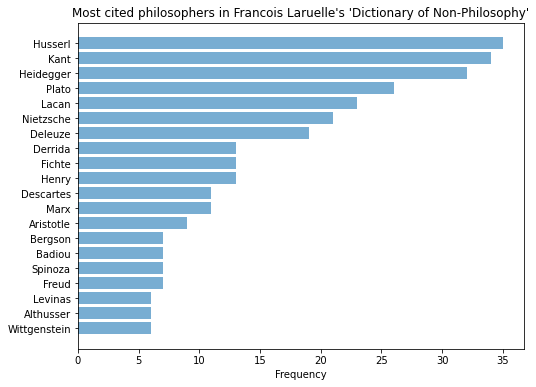

In [18]:
keys = [i for (i,j) in records if j>5] 
y_pos = range(len(keys)) #np.arange(len(keys))
performance = [j for (i,j) in records if j>5]
plt.figure(figsize=(8,6))
ax = plt.axes()
plt.barh(y_pos, performance, align='center', alpha=0.6) 
ax.invert_yaxis()
plt.yticks(y_pos, keys)
plt.xlabel('Frequency' )
sst="Most cited philosophers in %s" %titlename
plt.title(sst)
plt.show()

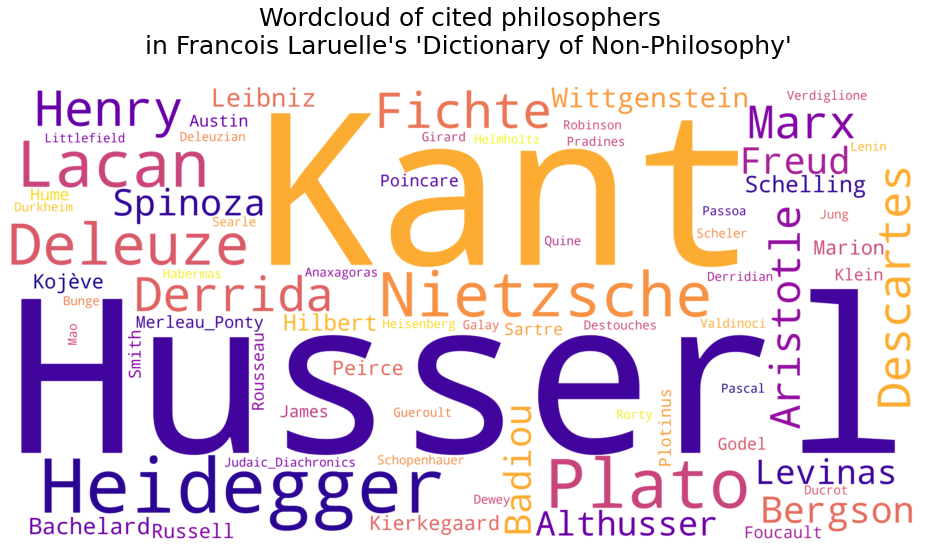

In [19]:
subsetd = pnf_df[['Names','Frequency of Occurrences']]
tuplesd = [tuple(x) for x in subsetd.values]

t=[]
for (i,j) in tuplesd:
    for k in range(j):
#         print(i.replace(" ","_").replace("-","_"))
        t.append(i.replace(" ","_").replace("-","_"))
ttd=' '.join(t)

wordcloud = WordCloud(collocations=False,background_color="white",colormap="plasma",width=4000,height=2000).generate(ttd)
fig = plt.figure(figsize=(13,13))
default_colors = wordcloud.to_array()
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
ss="Wordcloud of cited philosophers \n in %s" %titlename
plt.suptitle(ss,fontsize=25)
plt.tight_layout(rect=[0, 0, 1, 1.3])
plt.show()

In [20]:
items_d={}
text="\n".join(f).split("#")
text=[s.replace('\r','') for s in text if len(s)>0]
for t in text:
    tt=t.split('\n')
    tt=[s for s in tt if len(s)>0]
    items_d[tt[0].strip().lower()]=' '.join(tt[1:]).strip().lower()

In [21]:
neds = []

for k, v in items_d.items():
    for n, f in records:
        if n.lower() in v:
            neds.append((k, n))

print(len(neds))

300


In [22]:
edges=[]
for k,v in items_d.items():
    for kk in items_d.keys():
        if kk!=k:
            if kk in v:
                edges.append((k,kk))
print(len(edges))

864


In [23]:
edges += neds

print(len(edges))

1164


In [24]:
G0=nx.DiGraph()
G0.add_edges_from(edges)
print(len(G0), len(G0.edges()))

139 1164


In [25]:
st=titlename

In [26]:
mapping = {
    'other*': 'Other',
    'rea*l essence': 'real essence',
    'thought-worl*d': 'thought-world',
    'transcendenta*l axiomatic': 'transcendental axiomatic',
    'transcendenta*l science': 'transcendental science'
}

G = nx.relabel_nodes(G0, mapping)
print(len(G.nodes()), len(G.edges()))

139 1164


In [27]:
gnames = [n for n in G.nodes() if n.lower() in names]
gnodes = [n for n in G.nodes() if n.lower() not in names]

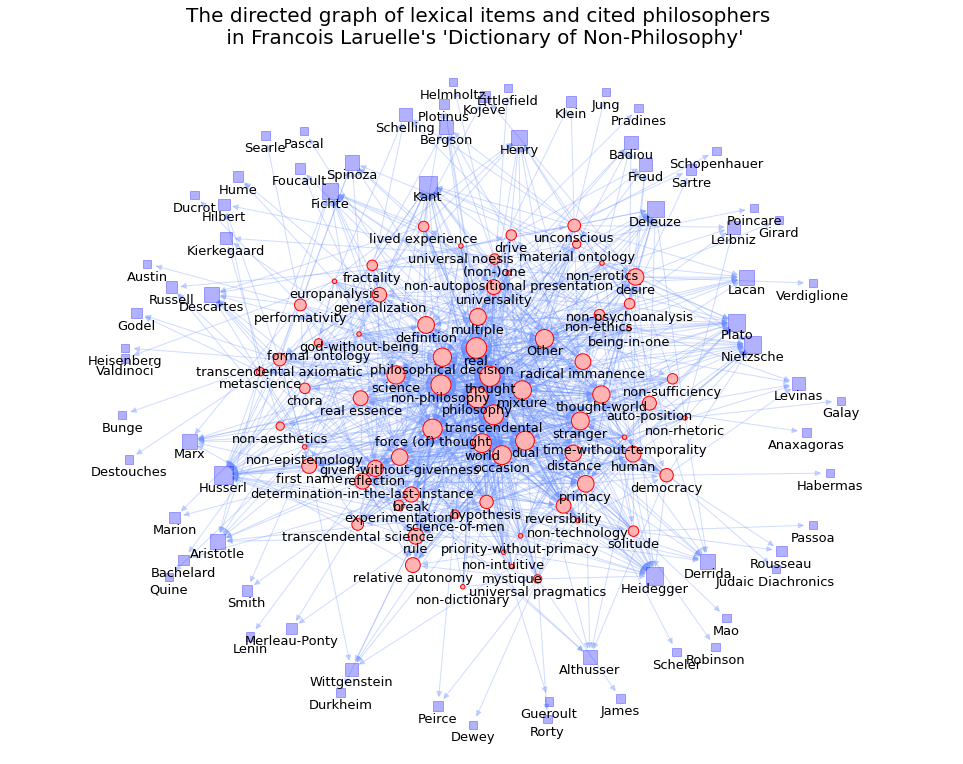

In [28]:
# nsi=[100*math.log(1+G.in_degree(n)) for n in G.nodes()]
nsi=[]
nsize = {}
for n in G.nodes():
    if n in gnodes:
        if G.in_degree(n)>0:
            nsi.append(100*math.log(1+G.in_degree(n)))
            nsize[n] = 100*math.log(1+G.in_degree(n))
        else:
            nsi.append(20)
            nsize[n] = 20
nsi1=[]
for n in G.nodes():
    if n in gnames:
        if G.in_degree(n)>0:
            nsi1.append(100*math.log(1+G.in_degree(n)))
            nsize[n] = 100*math.log(1+G.in_degree(n))
        else:
            nsi1.append(20)
            nsize[n] = 20

figsize=(17,13)
pos=graphviz_layout(G)

def centroidnp(arr):
    length = arr.shape[0]
    return np.sum(arr[:, 0]) / length, np.sum(arr[:, 1]) / length
    
centroid = centroidnp(np.array([np.array(v) for k, v in pos.items() if k in gnodes]))

upos = {}
colors_data = {}

dist = lambda a, b: ((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) ** .5
radmin = max(dist(v, centroid) for k, v in pos.items() if k in gnodes) * 2
radmax = max(dist(v, centroid) for k, v in pos.items() if k in gnames)

node_color="#ffb3b3"
node_color1="blue"
node_border_color="r"
edge_color="#668cff"

for k, v in pos.items():
    x1 = v[0] - centroid[0]
    y1 = v[1] - centroid[1]
    d = dist(v, centroid)
    theta = math.atan2(y1, x1)
    scale = 1.5
    scale1 = 2
    if k in gnames and d < radmin:
        upos[k] = (v[0] + math.cos(theta) * radmin * scale, v[1] + math.sin(theta) * radmin * scale)
        colors_data[k] = node_color1
    elif k in gnodes:
        upos[k] = (v[0] + math.cos(theta) * d * scale1, v[1] + math.sin(theta) * d * scale1)
        colors_data[k] = node_color
    
def adjust(a, t):
    for i, p in t.items():
        a[i] = a[i][0] + p[0], a[i][1] + p[1]

tweaks = {
    'universal noesis': (0, 5),
    'performativity': (0, -10),
    'transcendental axiomatic': (0, 10),
    'non-psychoanalysis': (0, 10),
    'europanalysis': (0, 20),
    'time-without-temporality': (0, 10),
    'force (of) thought': (-20, -10),
    'given-without-givenness': (-10, 10),
    'first name': (-40, -10),
    'philosophical decision': (30, 30),
    'radical immanence': (40, 0),
    'stranger': (20, -10),
    'real': (0, 50),
    'thought': (0, 20),
    'universal noesis': (0, 15),
    'non-philosophy': (0, 15),
    'material ontology': (30, 40),
    'reversibility': (30, 20),
    'experimentation': (-20, 20),
    'non-intuitive': (0, -15),
    'mystique': (60, 0),
    'transcendental science': (0, -15),
    'break': (20, -10),
    'Husserl': (-20, 0),
    'Quine': (0, -20),
    'Plato': (0, 20),
    'Plotinus': (0, -10),
    'Sartre': (0, -20),
    'Rousseau': (0, 20),
    'Leibniz': (0, -20)
}

adjust(upos, tweaks)
pos_data = upos

plt.figure(figsize=figsize);
g_nodes = nx.draw_networkx_nodes(G, upos, nodelist=gnodes, node_color=node_color,node_size=nsi)
g_names = nx.draw_networkx_nodes(G, upos, nodelist=gnames, node_color=node_color1, node_shape='s',node_size=nsi1, alpha=.3)
g_nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, upos,arrowsize=12, edge_color=edge_color,alpha=0.3)
# nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
plt.axis('off');
yoffset = {}
y_off = -20 # offset on the y axis
for k, v in upos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset,font_size=13);
sst="The directed graph of lexical items and cited philosophers \n in %s" %st
plt.title(sst,fontsize=20)
plt.margins(x=0.1, y=0)

In [29]:
graph_data = json_graph.node_link_data(G)

In [30]:
js_template = Template('''
sigmas.$order = new sigma({
  renderer: {
    container: 'container$order',
    type: 'canvas'
  },
  settings: {
    minArrowSize: 10,
    labelThreshold: 1,
    defaultLabelAlignment: 'bottom'
  }
})

bind = S=>{
  let graph = $graph_data
  let pos = $pos_data
  let colors = $node_colors
  let sizes = $size_data

  let get_neighbors = (id, g)=>{
    let res = {}
    g.nodes().map(n=>{
      if(g.edges().find(e=> ~[e.source, e.target].indexOf(n.id) && ~[e.source, e.target].indexOf(id))){
        res[n.id] = n
      }
    })
    return res
  }

  graph.nodes.map((a, i)=>{
    a.label = a.id
    a.x = pos[a.id][0]
    a.y = pos[a.id][1]
    a.color = colors[a.id]
    a.size = sizes[a.id]
    S.graph.addNode(a)
  })

  graph.links.map((a, i)=>{
    a.id = i
    a.type = '$edge_type'
    a.color = '$edge_color'
    S.graph.addEdge(a)
  })

  S.bind('clickNode', e=>{
    let id = e.data.node.id
    let keep = get_neighbors(id, S.graph)
    keep[id] = e.data.node
  
    S.graph.nodes().forEach(n=>{
      n.color = keep[n.id] ? colors[n.id] : '#eee'
    })
  
    S.graph.edges().forEach(e=>{
      e.color = keep[e.source] && keep[e.target] ? '$edge_color' : 'rgba(238, 238, 238, .3)'
    })
  
    S.refresh()
  })

  S.bind('clickStage', e=>{
    if(!e.data.captor.isDragging){
      S.graph.nodes().forEach(n=>{
        n.color = colors[n.id]
      })

      S.graph.edges().forEach(e=>{
        e.color = '$edge_color'
      })

      S.refresh()
    }
  })

  S.refresh()
}

bind(sigmas.$order)
''')

def htor(h):
    h = h.lstrip('#')
    return tuple(int(h[i:i+2], 16) for i in (0, 2, 4))

In [31]:
order = 'dir2'
js_text = js_template.substitute({
    'order': order,
    'graph_data': json.dumps(graph_data),
    'pos_data': json.dumps(upos),
    'edge_type': 'arrow',
    'node_colors': json.dumps(colors_data),
    'edge_color': 'rgba(%d, %d, %d, .5)' % htor(edge_color),
    'size_data': json.dumps(nsize)
})

html_template = Template('''
<h1 style='font-family:sans-serif;text-align:center'>$title</h1>
<br>
<div id='container$order' style='height:800px'></div>
<script>$js_text</script>
''')

html_text = html_template.substitute({
    'order': order,
    'title': sst,
    'js_text': js_text
})

HTML(html_text)

In [32]:
f = open('graph%s.html' % order, 'w+')
f.write(scripts + html_text)
f.close()